In [75]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers, metrics
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks",color_codes=True)
import pandas as pd
%matplotlib inline

In [59]:
#data = np.loadtxt('input/CY5S_dist_all.dat')
data = np.loadtxt('input/A2AH_dist.dat')
data = 1.0-data/np.max(data)

In [232]:
#helper function
import re
def read_Pycontact(file):
    with open(file,'r') as ins:
        data = []
        pair = []
        firstline = True
        for line in ins:
            if not firstline:
                line = line.rstrip('\n')
                tmp = re.findall( '\[(.*?)\]', line)[0].split(',')
                data.append([float(x) for x in tmp])
                tmp = line.split('[')[0].split()
                pair.append((int(tmp[0]),int(tmp[2])))
            else:
                firstline = False
    pair = np.asarray(pair)
    data = np.transpose(np.asarray(data))
    return pair, data

In [416]:
#villin data
pair, data = read_Pycontact('input/villin_contact_CA.txt')
data = (data-np.mean(data))/np.std(data)

In [285]:
np.median(data)

-0.1807113846494808

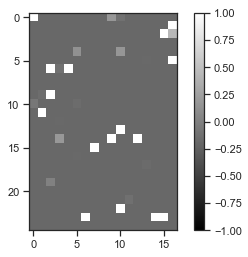

In [427]:
#plt.imshow(data[0].reshape(65,30))
plt.imshow(data[3000].reshape(25,17))
plt.gray()
plt.colorbar()
plt.clim((-1,1))

In [460]:
def build_autoencoder(f_dim,encode_dim,latent_dim, sparse=True, depth=1):
    intm_dim = encode_dim
    input_data = Input(shape=(f_dim,))
    if sparse:
        sparse_regularizer = regularizers.l1(10e-5)
    else:
        sparse_regularizer = None
        
    encoded = Dense(encode_dim, activation='relu', activity_regularizer=sparse_regularizer)(input_data)    
    for i in range(1,depth):
        encode_dim = encode_dim//10
        encoded = Dense(encode_dim, activation='relu', activity_regularizer=sparse_regularizer)(encoded)
    latent = Dense(latent_dim)(encoded)


    decoded = Dense(encode_dim, activation='relu')(latent)
    for i in range(1,depth): 
        encode_dim = encode_dim*10
        decoded = Dense(encode_dim, activation='relu')(decoded)
        
    decoded = Dense(f_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_data, decoded)

    encoder = Model(input_data, latent)

    # define decoder model
    #encoded_input= Input(shape=(latent_dim,))
    #encoded_input= Input(shape=(encode_dim,))
    #decoder_layer = autoencoder.layers[-1]
    #decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    return autoencoder, encoder

In [500]:
f_dim = data.shape[1]
encode_dim = 200
latent_dim = 1
depth = 1
print(data.shape)
autoencoder, encoder = build_autoencoder(f_dim, encode_dim, latent_dim, depth=depth)

(5843, 425)


In [501]:
autoencoder.compile(optimizer='adadelta',loss='mse',metrics=['mse'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        (None, 425)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 200)               85200     
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 201       
_________________________________________________________________
dense_148 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_149 (Dense)            (None, 425)               85425     
Total params: 171,226
Trainable params: 171,226
Non-trainable params: 0
_________________________________________________________________


In [420]:
x_train, x_test, _, _ = train_test_split(data,data, test_size=0.2)

In [502]:
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, shuffle=True, validation_data=(x_test, x_test),
                         verbose=2)

Train on 4674 samples, validate on 1169 samples
Epoch 1/100
 - 2s - loss: 1.2474 - mean_squared_error: 1.2140 - val_loss: 1.1508 - val_mean_squared_error: 1.1478
Epoch 2/100
 - 1s - loss: 0.9346 - mean_squared_error: 0.9224 - val_loss: 0.8754 - val_mean_squared_error: 0.8631
Epoch 3/100
 - 1s - loss: 0.8617 - mean_squared_error: 0.8531 - val_loss: 0.8676 - val_mean_squared_error: 0.8606
Epoch 4/100
 - 1s - loss: 0.8555 - mean_squared_error: 0.8489 - val_loss: 0.8621 - val_mean_squared_error: 0.8547
Epoch 5/100
 - 0s - loss: 0.8513 - mean_squared_error: 0.8449 - val_loss: 0.8588 - val_mean_squared_error: 0.8517
Epoch 6/100
 - 0s - loss: 0.8478 - mean_squared_error: 0.8415 - val_loss: 0.8551 - val_mean_squared_error: 0.8480
Epoch 7/100
 - 0s - loss: 0.8443 - mean_squared_error: 0.8382 - val_loss: 0.8520 - val_mean_squared_error: 0.8454
Epoch 8/100
 - 0s - loss: 0.8408 - mean_squared_error: 0.8350 - val_loss: 0.8488 - val_mean_squared_error: 0.8424
Epoch 9/100
 - 0s - loss: 0.8376 - mean_

Epoch 72/100
 - 1s - loss: 0.7923 - mean_squared_error: 0.7896 - val_loss: 0.8051 - val_mean_squared_error: 0.8019
Epoch 73/100
 - 1s - loss: 0.7921 - mean_squared_error: 0.7894 - val_loss: 0.8067 - val_mean_squared_error: 0.8032
Epoch 74/100
 - 0s - loss: 0.7918 - mean_squared_error: 0.7891 - val_loss: 0.8035 - val_mean_squared_error: 0.8004
Epoch 75/100
 - 1s - loss: 0.7920 - mean_squared_error: 0.7893 - val_loss: 0.8036 - val_mean_squared_error: 0.8005
Epoch 76/100
 - 1s - loss: 0.7917 - mean_squared_error: 0.7890 - val_loss: 0.8046 - val_mean_squared_error: 0.8014
Epoch 77/100
 - 1s - loss: 0.7914 - mean_squared_error: 0.7887 - val_loss: 0.8030 - val_mean_squared_error: 0.8000
Epoch 78/100
 - 1s - loss: 0.7915 - mean_squared_error: 0.7888 - val_loss: 0.8032 - val_mean_squared_error: 0.8003
Epoch 79/100
 - 1s - loss: 0.7913 - mean_squared_error: 0.7886 - val_loss: 0.8035 - val_mean_squared_error: 0.8004
Epoch 80/100
 - 1s - loss: 0.7910 - mean_squared_error: 0.7884 - val_loss: 0.802

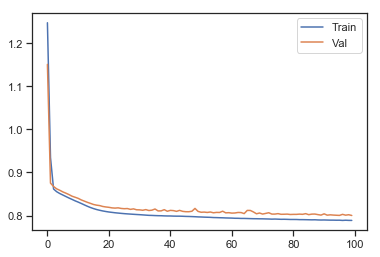

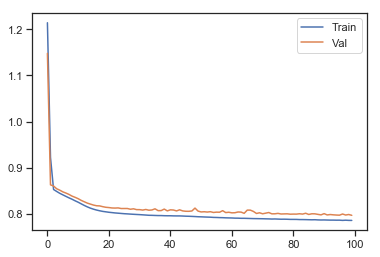

In [503]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Val')
plt.legend()
plt.figure()
plt.plot(history.history['mean_squared_error'],label='Train')
plt.plot(history.history['val_mean_squared_error'],label='Val')
plt.legend()

In [504]:
output = autoencoder.predict(data)
cv = encoder.predict(data)
cols = ['CV'+str(i) for i in range(1,latent_dim+1)]
cv_pd = pd.DataFrame(cv, columns=cols)
cv_pd.describe()

,CV1
count,5843.000000
mean,6.137078
std,5.791652
min,-2.785102
25%,2.633110
50%,4.101067
75%,6.819595
max,22.415783


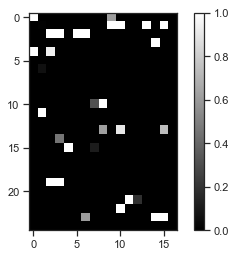

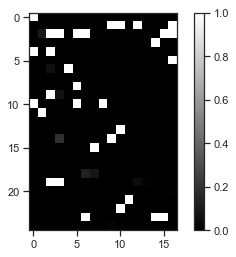

<Figure size 432x288 with 0 Axes>

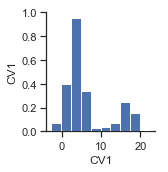

In [505]:
plt.imshow(data[5000].reshape(25,17))
plt.gray()
plt.colorbar()
plt.clim(0,1)
plt.figure()
plt.imshow(output[5000].reshape(25,17))
plt.gray()
plt.clim(0,1)
plt.colorbar()
plt.figure()
sns.pairplot(cv_pd)

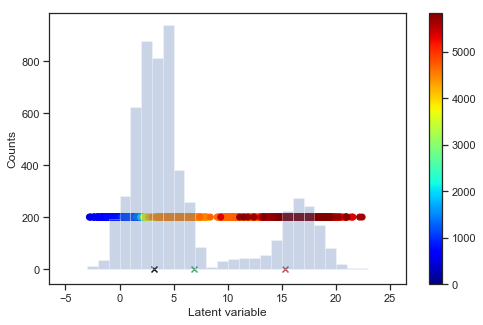

In [515]:
if np.shape(cv_pd)[1]>1:
    plt.scatter(cv_pd['CV1'],cv_pd['CV2'],marker='o')
    plt.scatter(cv_pd['CV1'][0],cv_pd['CV2'][0],c='k',marker='x')
    plt.scatter(cv_pd['CV1'][3000],cv_pd['CV2'][3000],c='g',marker='x')
    plt.scatter(cv_pd['CV1'][5830],cv_pd['CV2'][5830],c='r',marker='x')
else:
    fig = plt.figure(figsize=(8,5))
    plt.xlabel('Latent variable')
    plt.ylabel('Counts')
    plt.hist(cv_pd['CV1'],bins=np.linspace(-5,25,31),alpha=0.3)
    plt.scatter(cv_pd['CV1'][0],0,c='k',marker='x')
    plt.scatter(cv_pd['CV1'][4000],0,c='g',marker='x')
    plt.scatter(cv_pd['CV1'][5830],0,c='r',marker='x')
    plt.scatter(cv_pd['CV1'],200+np.zeros((1,len(cv_pd['CV1']))),c=np.arange(len(cv_pd['CV1'])),cmap='jet')
    plt.colorbar()    
    fig.savefig('figs/villin_model1.png',dpi=100)

In [516]:
autoencoder.save('models/villin-200-full.h5')
encoder.save('models/villin-200-encode.h5')

In [489]:
from keras import backend as K

class ActivationMaximization(object):
    def __init__(self, layer, filter_indices):
        self.name = "Activation Max Loss"
        self.layer = layer
        self.filter_indices = filter_indices #list object
    def build_loss(self):
        layer_output = self.layer.output
        
        loss = 0.
        for idx in self.filter_indices:
            loss += -K.mean(layer_output[:,idx])
        
        return loss
            
class Optimizer(object):
    def __init__(self, input_tensor, losses, norm_grads=True):
        self.input_tensor = input_tensor
        self.loss_names = []
        self.loss_functions = []
        self.wrt_tensor = K.identity(self.input_tensor)
        overall_loss = None
        for loss, weight in losses:
            if weight!=0:
                loss_fn = weight * loss.build_loss()
                overall_loss = loss_fn if overall_loss is None else overall_loss + loss_fn
                self.loss_names.append(loss.name)
                self.loss_functions.append(loss_fn)
        grads = K.gradients(overall_loss, self.input_tensor)[0]
        if norm_grads:
            grads = K.l2_normalize(grads)
        self.compute_fn = K.function([self.input_tensor, K.learning_phase()],
                                    self.loss_functions + [overall_loss, grads, self.wrt_tensor])
        
    def _rmsprop(self, grads, cache=None, decay_rate=0.95):
        if cache is None:
            cache = np.zeros_like(grads)
        cache = decay_rate * cache + (1 - decay_rate) * grads ** 2
        # -grad means minimize loss function
        step = -grads / np.sqrt(cache + K.epsilon())
        return step, cache

    def _get_seed_input(self, seed_input):
        desired_shape = (1, ) + K.int_shape(self.input_tensor)[1:]

        # seed_input cannot be None
        # Add batch dim if needed.
        if len(seed_input.shape) != len(desired_shape):
            seed_input = np.expand_dims(seed_input, 0)

        return seed_input.astype(K.floatx())
    
    



    def minimize(self, seed_input, max_iter=200,
                 grad_modifier=None,
                 callbacks=None, verbose=True):

        seed_input = self._get_seed_input(seed_input)
        
        def relu(grads):
            grads[grads < 0.] = 0.
            return grads
        
        def absolute(grads):
            return np.abs(grads)
        
        def deprocess_input(input_array, input_range=(0, 1)):
            # normalize tensor: center on 0., ensure std is 0.1
            input_array = input_array.copy()
            input_array -= input_array.mean()
            input_array /= (input_array.std() + K.epsilon())
            input_array *= 0.1

            # clip to [0, 1]
            input_array += 0.5
            #input_array = np.clip(input_array, 0, 1)

            # Convert to `input_range`
            return (input_range[1] - input_range[0]) * input_array + input_range[0]
    
        #try absolute for maximal change
        grad_modifier = locals()[grad_modifier]

        callbacks = callbacks or []
        #if verbose:
        #    callbacks.append(_PRINT_CALLBACK)

        cache = None
        best_loss = float('inf')
        best_input = None

        grads = None
        wrt_value = None

        for i in range(max_iter):
            # 0 learning phase for 'test'
            computed_values = self.compute_fn([seed_input, 0])
            losses = computed_values[:len(self.loss_names)]
            named_losses = list(zip(self.loss_names, losses))
            overall_loss, grads, wrt_value = computed_values[len(self.loss_names):]

            # TODO: theano grads shape is inconsistent for some reason. Patch for now and investigate later.
            if grads.shape != wrt_value.shape:
                grads = np.reshape(grads, wrt_value.shape)
                
            # Apply grad modifier.
            grads = grad_modifier(grads)

            # Trigger callbacks
            for c in callbacks:
                c.callback(i, named_losses, overall_loss, grads, wrt_value)

            # Gradient descent update.
            # It only makes sense to do this if wrt_tensor is input_tensor. Otherwise shapes wont match for the update.
            step, cache = self._rmsprop(grads, cache)
            seed_input += step

            if overall_loss < best_loss:
                best_loss = overall_loss.copy()
                best_input = seed_input.copy()

        # Trigger on_end
        for c in callbacks:
            c.on_end()

        return deprocess_input(best_input[0]), grads, wrt_value

def normalize(array, min_value=0., max_value=1.):
    arr_min = np.min(array)
    arr_max = np.max(array)
    normalized = (array - arr_min) / (arr_max - arr_min + K.epsilon())
    return (max_value - min_value) * normalized + min_value
    

def visualize_saliency(model, layer_idx, filter_indices, seed_input, grad_modifier='absolute'):
    input_tensor = model.input
    losses = [(ActivationMaximization(encoder.layers[layer_idx],filter_indices),1)]
    opt = Optimizer(input_tensor, losses, norm_grads=False)
    grads = opt.minimize(seed_input=seed_input, max_iter=10, grad_modifier=grad_modifier)
    return grads

best input: [[75 70]
 [69 51]
 [61 56]
 [61 47]
 [55 50]
 [70 51]
 [76 67]
 [72 48]
 [66 61]
 [65 47]]
gradient: [[70 62]
 [76 59]
 [62 55]
 [71 52]
 [60 46]
 [60 54]
 [63 52]
 [52 44]
 [58 44]
 [56 46]]


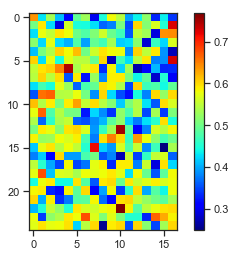

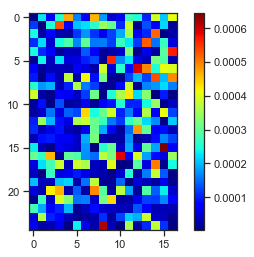

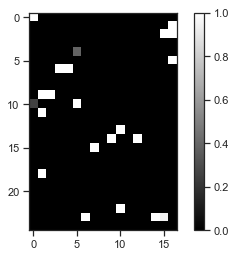

In [491]:
layer_idx = 2
filter_indices = [0]
grads = visualize_saliency(encoder, layer_idx, filter_indices, x_test, grad_modifier='absolute')

rank = (np.argsort(grads[0],axis=0))[::-1]
print('best input:',pair[rank[0:10]])
plt.imshow(grads[0].reshape(25,17),cmap='jet')
plt.colorbar()
#plt.clim(0,1)
plt.figure()
plt.imshow(np.mean(grads[1],axis=0).reshape(25,17),cmap='jet')
rank = (np.argsort(np.mean(grads[1],axis=0)))[::-1]
print('gradient:',pair[rank[0:10]])
plt.colorbar()
plt.figure()
plt.imshow(grads[2][0].reshape(25,17))
plt.colorbar()
plt.clim(0,1)

In [123]:
absolute
[[75 70]
 [69 51]
 [61 56]
 [61 47]
 [55 50]
 [70 51]
 [76 67]
 [72 48]
 [66 61]
 [65 47]]

[[75 70]
 [69 51]
 [61 56]
 [55 50]
 [61 47]
 [70 51]
 [76 67]
 [76 70]
 [72 48]
 [65 47]]

0 input_18
1 dense_21
2 dense_22
